# First Assignment - Netflix Stock

## Data Manipulation

In this first assignment we are calculating some interesting facts and data about Netflix Inc, from 12/31/2014 to 12/31/2020. We are using python3.x in a Jupyter Notebook, in the end the *.py* code will be provided. The data was collected from Yahoo Finance, in this [link](https://finance.yahoo.com/quote/NFLX/history?period1=1420070400&period2=1609459200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true).

Like any program in python we start by importing the necessary packages.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import datetime as datetime
import matplotlib.dates as mdates
import seaborn; seaborn.set()
import numpy.fft as ft

from scipy.optimize import curve_fit

%matplotlib inline 

Then, reading the csv and showing the first line to be sure everything is in order.

In [ ]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,49.151428,50.331429,48.731430,49.848572,49.848572,13475000
1,2015-01-05,49.258572,49.258572,47.147144,47.311428,47.311428,18165000
2,2015-01-06,47.347141,47.639999,45.661430,46.501431,46.501431,16037700
3,2015-01-07,47.347141,47.421429,46.271427,46.742859,46.742859,9849700
4,2015-01-08,47.119999,47.835712,46.478573,47.779999,47.779999,9601900


Let's see the type of the data's columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1511 non-null   object 
 1   Open       1511 non-null   float64
 2   High       1511 non-null   float64
 3   Low        1511 non-null   float64
 4   Close      1511 non-null   float64
 5   Adj Close  1511 non-null   float64
 6   Volume     1511 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.8+ KB


The date column is stored as an object, is not the type we need it, perform this function and pandas will take care.




In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Just to be sure, repeating the function

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1511 non-null   datetime64[ns]
 1   Open       1511 non-null   float64       
 2   High       1511 non-null   float64       
 3   Low        1511 non-null   float64       
 4   Close      1511 non-null   float64       
 5   Adj Close  1511 non-null   float64       
 6   Volume     1511 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.8 KB


And, for analysis purpuses, we calculate the weakly and monthly mean.

In [ ]:
dfc = df.copy()
dfc.set_index('Date', inplace=True)

dfM = dfc.resample('M').mean()
dfW = dfc.resample('W-MON').mean()

dfW.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,49.205000,49.795001,47.939287,48.580000,48.580000,15820000
2015-01-12,47.307142,47.623142,46.114857,46.722572,46.722572,11602360
2015-01-19,46.624286,47.363571,45.951430,46.754644,46.754644,17493000
2015-01-26,57.987430,59.451144,57.158286,59.158286,59.158286,37765140
2015-02-02,63.401715,64.300284,62.648571,63.522858,63.522858,18095840


In [ ]:
dfM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,53.277286,54.124428,52.366857,53.409358,53.409358,2.129690e+07
2015-02-28,65.921278,66.716316,65.365414,66.131729,66.131729,1.103572e+07
2015-03-31,62.793182,63.387143,61.949025,62.522987,62.522987,1.490300e+07
2015-04-30,71.971836,73.002925,71.320001,72.260544,72.260544,2.421257e+07
2015-05-31,85.057429,85.842928,84.356072,85.199928,85.199928,1.400154e+07


Now we got the Dateframe in datetime type of memory, and the means over some periods, we can visualize the data in all forms we want or need.

## Data Visualization

After the manipulation we can start to retrieve some information from the data. The simplest one is the temporal series. Here we can see the close price of the Netflix through the years.

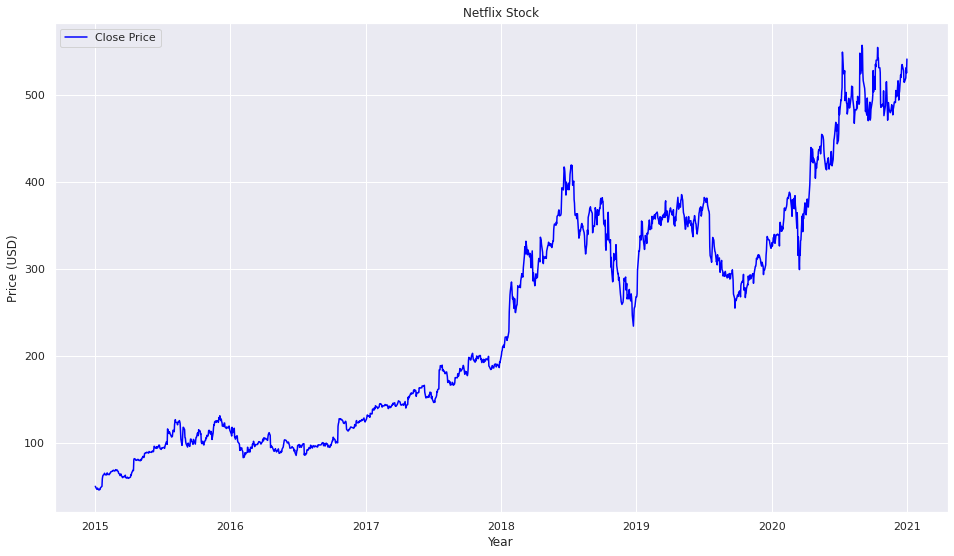

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(df['Date'],df['Close'], c='blue', label='Close Price')

plt.legend(loc='upper left')
plt.title('Netflix Stock')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

plt.show()

Lets plot the mean over the week, from monday to monday, and over the month. We can see how much our price changes every week, or month. 

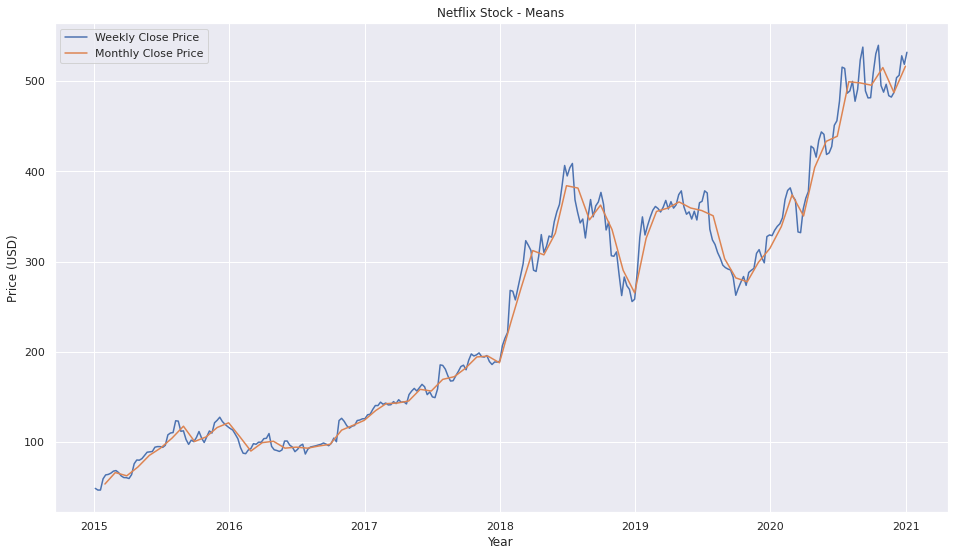

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(dfW['Close'], label='Weekly Close Price')
plt.plot(dfM['Close'], label='Monthly Close Price')

plt.legend(loc='upper left')
plt.title('Netflix Stock - Means')
plt.xlabel('Year')
plt.ylabel('Price (USD)')

plt.show()

There was a major grow in the end of 2018, but why? According to Variety [[$^2$](https://variety.com/2018/digital/news/netflix-original-series-licensed-viewing-friends-the-office-1203085230/)] in the last quarter of 2018 Netflix increased it's original contents. Still, more than 60% was licensed content, like "The Office" and "Friends", but the interest of shows like "The Chilling Adventures of Sabrina" or "The Haunting of Hill House" could be the reason of such grow.

This strategy does not long for much time, in the half of 2019 Netflix had drops in it's price. The fault could be the same that caused the grow, half year before [[$^3$](https://www.marketwatch.com/story/netflixs-content-strategy-isnt-working-so-expect-even-more-drops-in-the-stock-2019-07-19)].

One final comment, take a look at 2020. The price spikes. Netflix reported that it had a jump of subscribers. This jump could be associated to the COVID-19 and stay-at-home orders [[$^4$](https://www.cnbc.com/2020/04/21/netflix-nflx-earnings-q1-2020.html)].


---


As we can see there is too much information, we can interpretate the temporal series but there is a limit of what we can do. The price goes ups and downs from day to day, and it's bigger today than it was in 2014, but how can we avaluate this fluctuation? Let's calculate the financials returns of this stock, beginning with the linear return. The linear return represents how much the price variates from time to time. Using the equation

\begin{align}
  R_{t} = \frac{x_{i+\Delta t}}{x_i} - 1
\end{align}

denoting $x_{i}$ as the price of the day and $\Delta t$ as time variation. Here $\Delta t$ equals one day and then we will have the linear return ($R_t$) for every day of our series, except from the last day, as we necessarialy will need the price of next day.

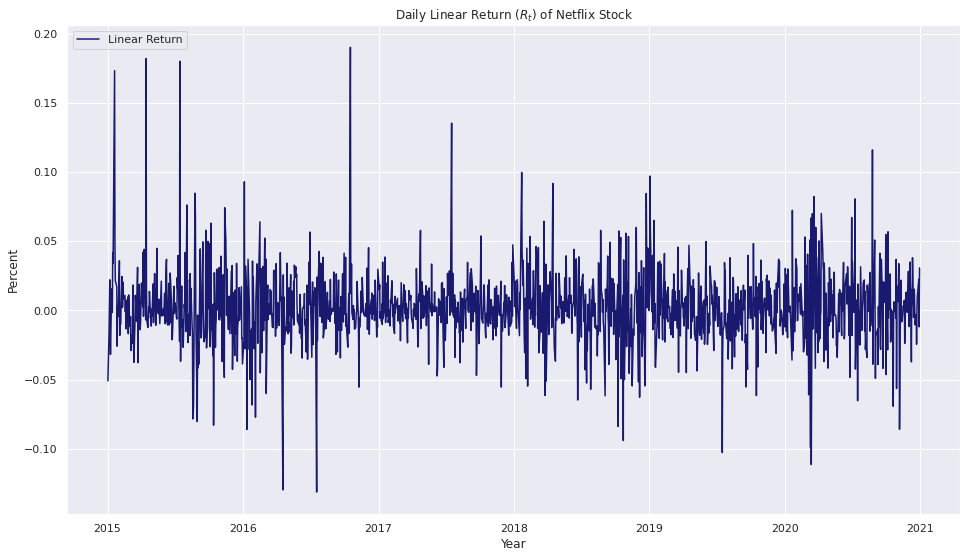

In [ ]:
N = len(df['Date'])

c_values = df['Close'].values
d_valuess = df['Date'].values
d_values = []
l_return = []

for i in range(N-1):
  l_return.append(c_values[i + 1]/c_values[i] - 1)
  d_values.append(d_valuess[i])

fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(d_values,l_return, c='midnightblue', label='Linear Return')

plt.legend(loc='upper left')
plt.title('Daily Linear Return ($R_t$) of Netflix Stock')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.show()

By construction, if the price of the next day is bigger we will have a positive variation, and if it is smaller a negative variation is showed. Still, if the variation between two days we will have a variation closer to zero. So defining

\begin{align}
  r_{t} = \log{(1 + R_t)}
\end{align}

and inputing the equation of linear return we obtain the log return

\begin{align}
  r_{t} = \log{\left(\frac{x_{i+\Delta t}}{x_{i}}\right)} =\log{(x_{i+\Delta t})} - \log{(x_i)} \approx R_t
\end{align}

It is an approximation of the linear return, but have some better statistics proprieties [[$^1$](http://www.portalaction.com.br/series-temporais/51-retornos)]. Again, we use $\Delta t$ as one day and this gives us the log return ($r_{t}$) for every day of our series.

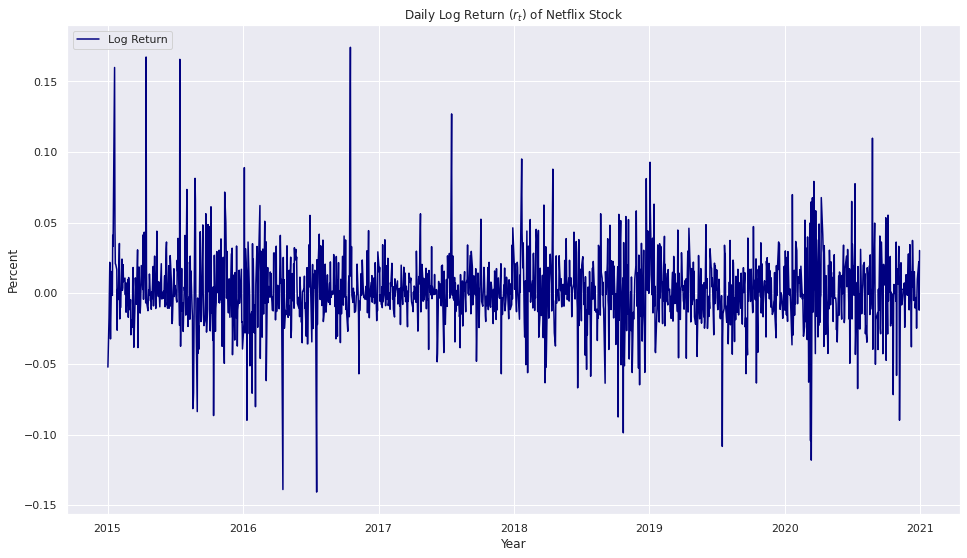

In [ ]:
log_return = []

for i in range(N-1):
  log_return.append(np.log(c_values[i+1]) - np.log(c_values[i]))

fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(d_values, log_return, c='navy', label='Log Return')

plt.legend(loc='upper left')
plt.title('Daily Log Return ($r_t$) of Netflix Stock')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.show()

Looking at those two graphics the first thing that comes in mind is that they the same. But they're not. Here we are calculate the difference between the log return and the linear return. 

[]

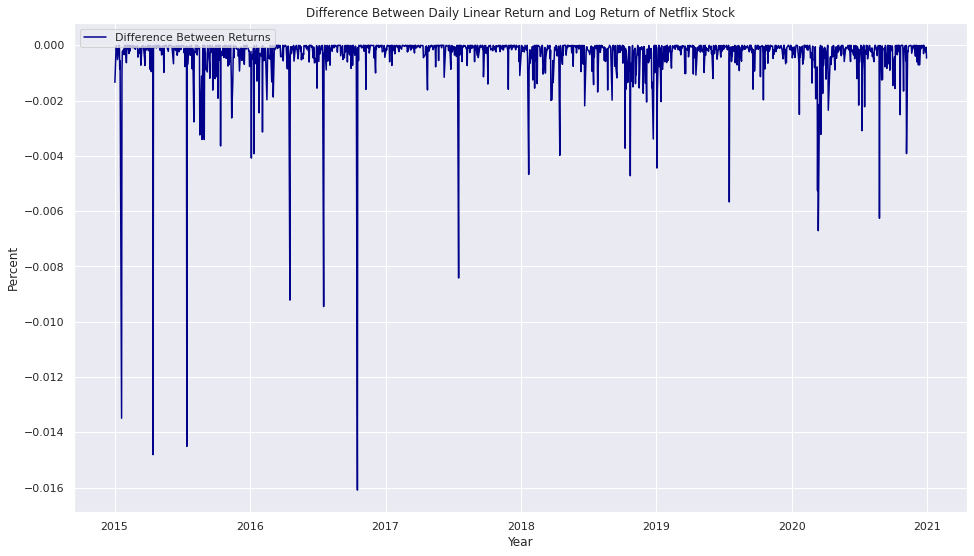

In [ ]:
diff = []

for i in range(N-1):
  diff.append(log_return[i]-l_return[i])

fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(d_values, diff, c='darkblue', label='Difference Between Returns')

plt.legend(loc='upper left')
plt.title('Difference Between Daily Linear Return and Log Return of Netflix Stock')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.plot()

One may notice the log return is always bigger than the linear return. Why is that? Well, if you define two functions, one linear and one logarithm, you can clearly see the linear one growing faster and it's always bigger that the log one.

Take a look at the graph:

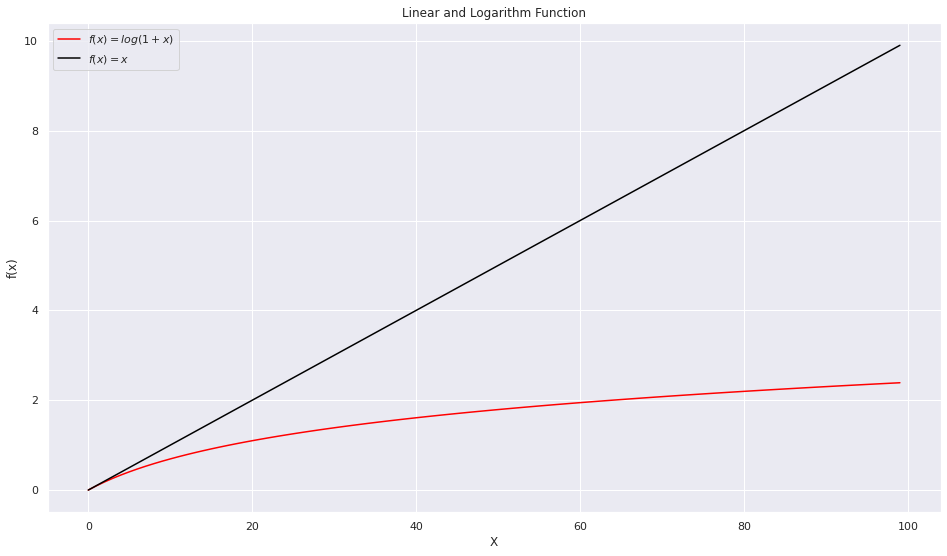

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(0, 10, 0.1)
y = np.log(1+x)
z = 1*x

ax.plot(y, color='red', label='$f(x) = log(1+x)$')
ax.plot(z, color='black', label='$f(x) = x$')

plt.legend(loc='best')
plt.title('Linear and Logarithm Function')
plt.xlabel('X')
plt.ylabel('f(x)')


plt.show()


Yet we are dealing with small variations, so the difference is not bigger than 0.02. 

At last we can also do so for the normalized return, which is modeled by

\begin{align}
  r_{a} = \frac{(r_t - \mu)}{\sigma}
\end{align}

where $\mu$ is the mean of our series and $\sigma$ is de standard deviation. The reason for do this return is to compare with others, but this is not the scope of this work. We're just introducing some important returns. 

[]

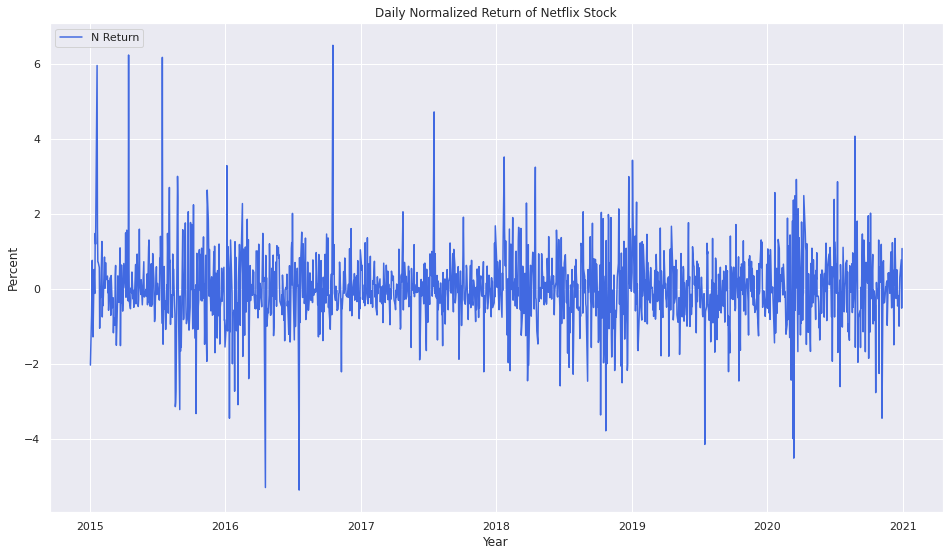

In [ ]:
n_return = []

mean = np.average(log_return)
stdev = np.std(log_return)

for i in range(N-1):
  n_return.append((log_return[i]-mean)/stdev)

fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(d_values,n_return, c='royalblue', label='N Return')

plt.legend(loc='upper left')
plt.title('Daily Normalized Return of Netflix Stock')
plt.xlabel('Year')
plt.ylabel('Percent')

plt.plot()

There is more information we can take from Netflix. We can do the logarithm return's distribution. This distribution will show us how probable is from the price variates. 

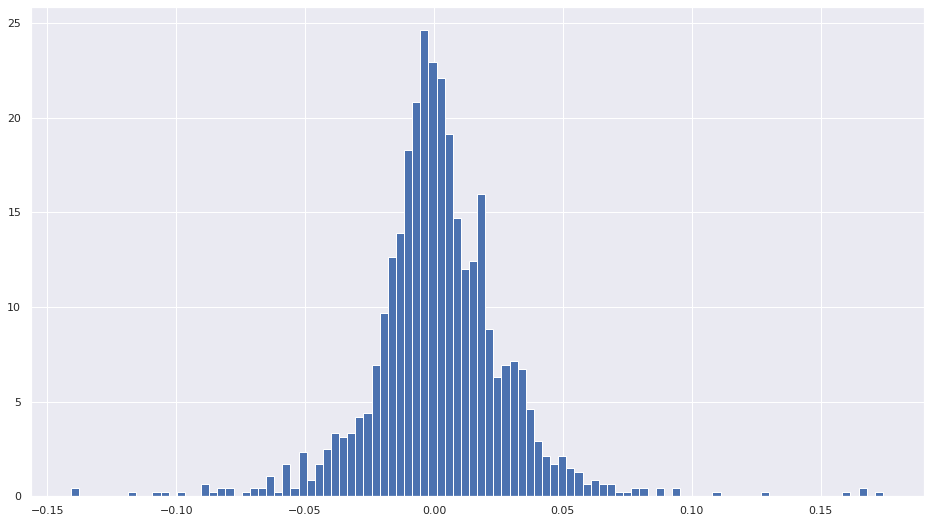

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
plt.hist(log_return, bins=100, density=True)

plt.show()

We can see that the distribution has a gaussian form. The gaussian distribution is given by

\begin{align}
f(x) = \frac{A}{\sigma \sqrt{2 \pi}} e^{- \frac{(x - \mu)^2}{2 \sigma^2}}
\end{align}

Where $\mu$ is the mean of our log return, $\sigma$ is the standard deviation and $A$ is the amplitude of our gaussian. We now plot the two together.

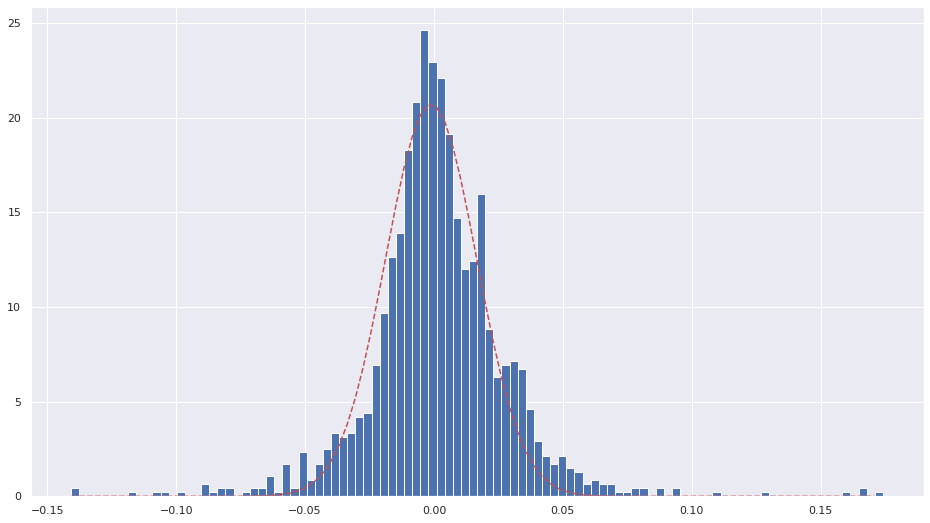

In [ ]:
def normal_dist(x, mu, msd, A):
    return (A/msd*np.sqrt(2*np.pi))*(np.exp(-0.5*((x-mu)/msd)**2))

fig, ax = plt.subplots(figsize=(16, 9))
 
count, bins, ignored = plt.hist(log_return, bins=100, density=True)

bins = np.array(bins)
bins = bins[:-1]

fit_values, co_matrix = curve_fit(normal_dist, bins, count) 

L, M, N = fit_values

plt.plot(bins, normal_dist(bins, L, M, N), '--r')

plt.show()

As we can see there is some trouble in our fit. This could be connected with one major error source: there is too little data. We are dealing with six years of daily data. If we have more data the gaussian fit would be better. 

Let's take the residue between the theoretical fit and our logarithm return density. The residue, commonly denoted as R-squared ($R^2$), is given by the equation

\begin{aligned}
    R^2 = \frac{1}{N} \sum_N^i (x_n^t - x_n^m)^2 - 1
\end{aligned}

Where $N$ is the number of samples, $x_n^t$ is the theoretical value and $x_n^m$ is the measured value. 

In [ ]:
r_squared_l = []

for i in range(len(count)):
    r_squared_l.append((normal_dist(bins[i],L,M,N) - count[i])**2)

R_squared = sum(r_squared_l)/len(r_squared_l) - 1 

print(R_squared)

0.5571364450020715


Look, as was said before, our data is not very well fitted. The R-squared says this, the value is approximated 55%. Again, it will be need more data to get a good Gaussian fit.

---

To wrap it up this assignment we need to do one more thing: We must calculate the spectral density, which is given by

\begin{aligned}
    S(x) = |\mathcal{F}\{x\}|^2
\end{aligned}

and see it's behavior. To calculate the Fourier Transform [[$^5$](https://mathworld.wolfram.com/Wiener-KhinchinTheorem.html)]we must assume that the mean and the covariance our log return's series is invariant in time. Mathematically speaking:

\begin{aligned}
    \mu(t + \tau) = \mu(t)
\end{aligned}

\begin{aligned}
    C_{xx}(t_1, t_2) = C_{xx}(t_1 - t_2, 0)
\end{aligned}

And, evaluating the Fourier Transform we can use the Wiener-Khinchin theorem to calculate the Spectral Density as said before.


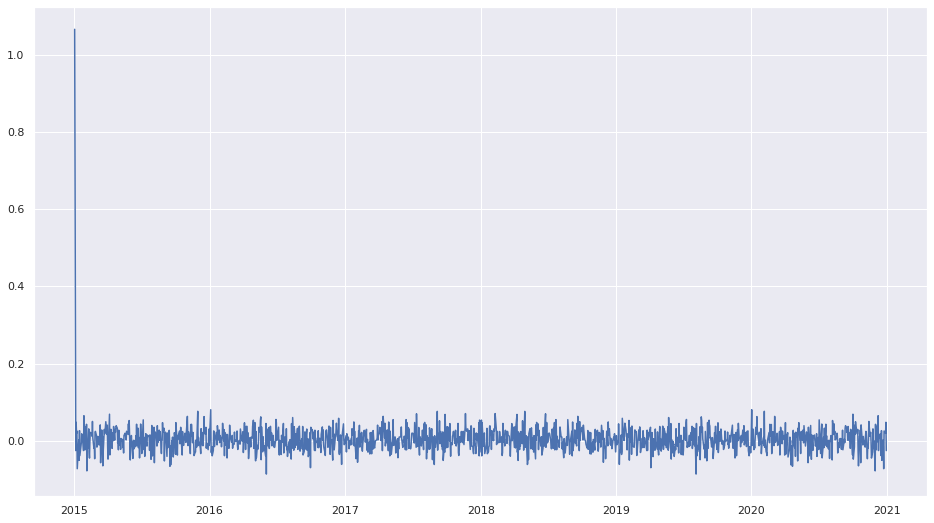

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))

f = ft.fft(log_return)
s = f*np.conj(f)
c = ft.ifft(s).real

plt.plot(d_values,c)
plt.show()

It is expected that it rapidly falls and became only a noise around zero. This is actually and stylized fact, any result diffent than that, some periodicity, means the market has some type of memory. We can clearly see that happens exactly what was expected, our spectral density falls very fast and then became a noise aroud zero. Our price has no memory at all, which is a good thing, if any periodicity was found it would be a bad sign for Netflix.

---

This assignment was very productive for me, I'm still learning Python and if weren't for this, I probably never even begin. If you want to download the *.py* or the *.ipynb* there is some link below.

[Python Code](http://lief.if.ufrgs.br/~pedhmendes/cadeiras/econofisica/first_assignment.py)

[Jupyter Notebook Code](http://lief.if.ufrgs.br/~pedhmendes/cadeiras/econofisica/first_assignment.ipynb)